In [27]:
## Mount the drive with colab

In [28]:
cd /content/drive/MyDrive/Deep Learning projects/Potato Disease Classification

/content/drive/MyDrive/Deep Learning projects/Potato Disease Classification


In [29]:
!ls

 PlantVillage   PlantVillage.zip  'Potato Disease Classification.ipynb'


In [30]:
!unzip PlantVillage.zip

Archive:  PlantVillage.zip
replace PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG  
  inflating: PlantVillage/Potato___Early_blight/002a55fb-7a3d-4a3a-aca8-ce2d5ebc6925___RS_Early.B 8170.JPG  
  inflating: PlantVillage/Potato___Early_blight/009c8c31-f22d-4ffd-8f16-189c6f06c577___RS_Early.B 7885.JPG  
  inflating: PlantVillage/Potato___Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG  
  inflating: PlantVillage/Potato___Early_blight/0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG  
  inflating: PlantVillage/Potato___Early_blight/02578b86-b234-4ac0-9bc3-691b5610e2bf___RS_Early.B 7562.JPG  
  inflating: PlantVillage/Potato___Early_blight/0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG  
  inflating: PlantVillage/Potato___Early_blight/028f9b73-142f-499a-

In [31]:
## Import all the importatnt libraries
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


In [32]:
DATA_PATH='/content/drive/MyDrive/Deep Learning projects/Potato Disease Classification/PlantVillage'
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3 ##RGB

In [33]:
## Load the dataset

dataset=tf.keras.preprocessing.image_dataset_from_directory(DATA_PATH,
                                                            shuffle=True,
                                                            image_size=(IMAGE_SIZE,IMAGE_SIZE) ,
                                                            batch_size=BATCH_SIZE)

Found 2152 files belonging to 3 classes.


In [34]:
## Get all the class names

class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [35]:
## exploring the dataset

for image_batch, label_batch in dataset.take(1): ## take(1) means taking 1st batch
  print(image_batch.shape)
  print(label_batch)

(32, 256, 256, 3)
tf.Tensor([1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 2 0 0 1 1 1 1], shape=(32,), dtype=int32)


In [36]:
print(label_batch.numpy())

[1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 2 0 0 1 1 1 1]


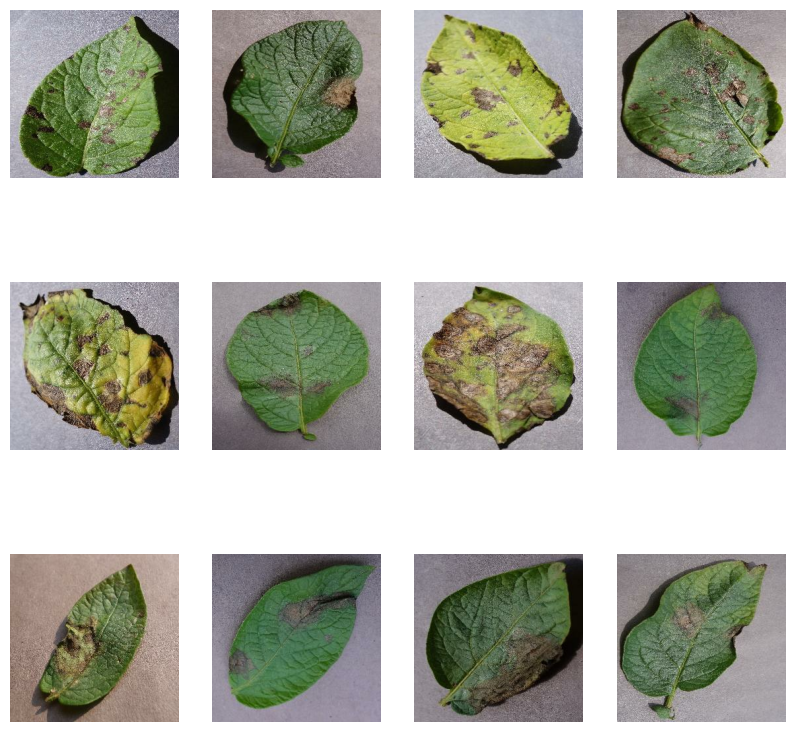

In [37]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1): ## take(1) means taking 1st batch
  for i in range(12):
    ax=plt.subplot(3,4,i+1) ## 3 rows 4 columns
    plt.imshow(image_batch[i].numpy().astype('uint8')) ##matplotlib always takes in numpy, convert the datatype from float to int using 'uint8'
    plt.axis("off")

In [38]:
# Steps
#1. model architecture
#2.model compilation
#3.model.fit


In [39]:
# Training- dataset to be used while training
# validation - dataset to be tested against while training
# test - dataset to be tested against after we trained model

# 80% Training
# 20% - 10% Validation and 10% test

In [40]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [41]:
train_ds=dataset.take(54)
len(train_ds)

54

In [42]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [43]:
val_size=0.5
testing_ds=dataset.skip(54)
len(testing_ds)

14

In [44]:
test_ds=testing_ds.take(7)
print(len(test_ds))

validation_ds=testing_ds.skip(7)
print(len(validation_ds))

7
7


In [45]:
model=models.Sequential()
model.add(layers.Conv2D(36, kernel_size=3, activation='relu' ))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(64, kernel_size=3, activation='relu' ))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128, kernel_size=3, activation='relu' ))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128, kernel_size=3, activation='relu' ))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Conv2D(128, kernel_size=3, activation='relu' ))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(64,activation='relu'))

model.add(layers.Dense(3,activation='softmax'))






In [46]:
model.compile(optimizer='adam',loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=['accuracy'])


In [77]:
from keras.callbacks import ModelCheckpoint

In [75]:
#checkpoint=ModelCheckpoint("best_model.weights.h5", monitor='loss',save_best_only=True,save_weights_only=True)

In [76]:
history=model.fit(train_ds,batch_size=BATCH_SIZE,epochs=15,validation_data=validation_ds)#,callbacks=['checkpoint'])

AttributeError: 'str' object has no attribute 'set_model'

In [48]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - accuracy: 0.9646 - loss: 0.0759


[0.10971266031265259, 0.9598214030265808]

In [49]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [50]:
model.save('potato_class_96.h5')

In [52]:
ls

 PlantVillage/   PlantVillage.zip   potato_class_96.h5  'Potato Disease Classification.ipynb'


In [58]:
## Load the model

import numpy as np

loaded_model=tf.keras.models.load_model('potato_class_96.h5')

image_path='/content/drive/MyDrive/Deep Learning projects/Potato Disease Classification/PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG'

test_image=tf.keras.preprocessing.image.load_img(image_path,target_size=(256,256))
test_image=tf.keras.preprocessing.image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)
print(test_image.shape)
pred_value=loaded_model.predict(test_image)
class_names[np.argmax(pred_value)]


(1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


'Potato___Early_blight'